In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import simweights
import pickle
import os, sys
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import pandas as pd
import tables
import h5py
import math
from scipy.stats import mstats
import matplotlib as mpl
import matplotlib.font_manager as font_manager


In [6]:
sys.path.append('/data/user/tvaneede/GlobalFit/reco_processing/notebooks/weighting')

from datasets import datasets

In [4]:
filetype = "NuTau_E2" # NuTau_E2

In [7]:
# astro
per_flavor_norm = 2.12
gamma_astro = 2.87
livetime_yr = 11.687
livetime_s  = livetime_yr * 365.25 * 24 * 3600 # 11.687 year

def AstroFluxModel(pdgid, energy, cos_zen):
    flux = 0.5*(per_flavor_norm*1e-18)*(energy/1e5)**-gamma_astro
    return flux

In [8]:
def get_var_weights( dataset_name, filetype = "NuTau_E2" ):
    file     = datasets[dataset_name][filetype]["file_path"]
    nfiles   = datasets[dataset_name][filetype]["nfiles"]
    hdf      = pd.HDFStore(file,'r')
    weighter = simweights.NuGenWeighter(hdf, nfiles=nfiles)
    weights  = weighter.get_weights( AstroFluxModel )
    return hdf, weights, weighter

In [9]:
# ftp l3 files
hdf_ftp_l3casc, weights_ftp_l3casc, weighter_ftp_l3casc = get_var_weights( "ftp_l3casc" )
hdf_ftp_v2, weights_ftp_v2, weighter_ftp_v2 = get_var_weights( "v2" )

In [10]:
# spice l3 files
hdf_spice_l3casc, weights_spice_l3casc, weighter_spice_l3casc = get_var_weights( "spice_l3casc" )
hdf_spice_tau_reco, weights_spice_tau_reco, weighter_spice_tau_reco = get_var_weights( "spice_tau_reco" )

How do ftp and spice compare? They match very well.

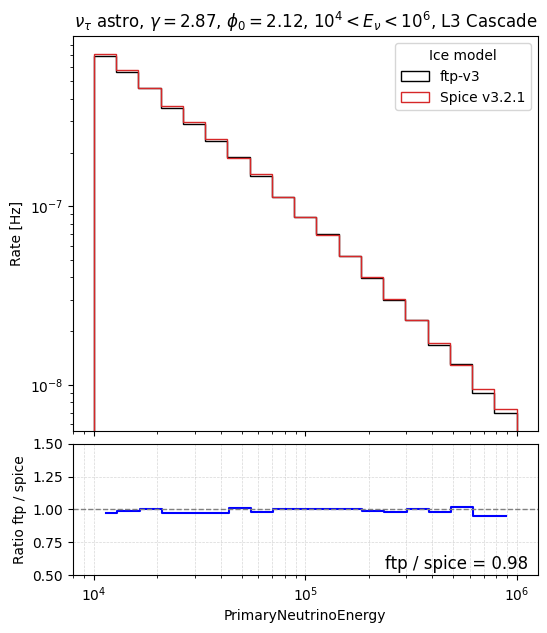

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Define your variable and bins
variable = "PrimaryNeutrinoEnergy"
bins = np.geomspace(1e4, 1e6, 20)

# Compute histograms
hist_spice, _ = np.histogram(hdf_spice_l3casc["I3MCWeightDict"][variable], bins=bins, weights=weights_spice_l3casc)
hist_ftp, _ = np.histogram(hdf_ftp_l3casc["I3MCWeightDict"][variable], bins=bins, weights=weights_ftp_l3casc)

# Compute ratios
ratio = hist_ftp / hist_spice

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create subplots with shared x-axis
fig = plt.figure(figsize=(6, 7))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)
ax = fig.add_subplot(gs[0])
ax_ratio = fig.add_subplot(gs[1], sharex=ax)

# Upper plot: histograms
ax.hist(hdf_ftp_l3casc["I3MCWeightDict"][variable].values, weights=weights_ftp_l3casc, bins=bins, histtype="step", label="ftp-v3", color="black")
ax.hist(hdf_spice_l3casc["I3MCWeightDict"][variable].values, weights=weights_spice_l3casc, bins=bins, histtype="step", label="Spice v3.2.1", color="C3")

ax.set_title(r"$\nu_\tau$ astro, $\gamma = 2.87$, $\phi_0=2.12$, $10^4 < E_\nu < 10^6$, L3 Cascade")
# ax.set_xlim(1e4,1e6)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Rate [Hz]")
ax.legend(title="Ice model")

# Lower plot: ratio
ax_ratio.plot(bin_centers, ratio, drawstyle="steps-mid", color="blue")
ax_ratio.set_xscale("log")
ax_ratio.set_ylabel("Ratio ftp / spice")
ax_ratio.set_xlabel(variable)
ax_ratio.axhline(1, color="gray", linestyle="--", linewidth=1)

ax_ratio.text(
    0.98, 0.02, f"ftp / spice = {sum(weights_ftp_l3casc)/sum(weights_spice_l3casc):.2f}",
    transform=ax_ratio.transAxes,
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='right')

# Improve layout
plt.setp(ax.get_xticklabels(), visible=False)
ax_ratio.set_ylim(0.5, 1.5)  # adjust as needed
ax_ratio.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)

plt.show()


/tmp/ipykernel_52028/3996878347.py:14: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_ftp / hist_spice
/tmp/ipykernel_52028/3996878347.py:14: RuntimeWarning: invalid value encountered in divide
  ratio = hist_ftp / hist_spice


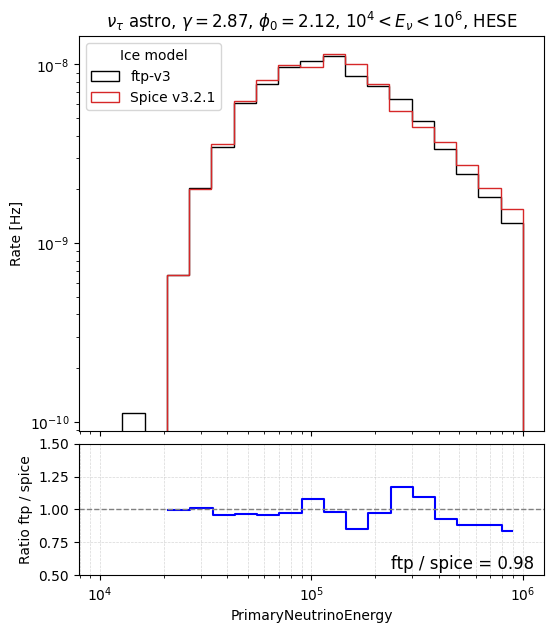

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Define your variable and bins
variable = "PrimaryNeutrinoEnergy"
bins = np.geomspace(1e4, 1e6, 20)

# Compute histograms
hist_spice, _ = np.histogram(hdf_spice_tau_reco["I3MCWeightDict"][variable], bins=bins, weights=weights_spice_tau_reco)
hist_ftp, _ = np.histogram(hdf_ftp_v2["I3MCWeightDict"][variable], bins=bins, weights=weights_ftp_v2)

# Compute ratios
ratio = hist_ftp / hist_spice

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create subplots with shared x-axis
fig = plt.figure(figsize=(6, 7))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)
ax = fig.add_subplot(gs[0])
ax_ratio = fig.add_subplot(gs[1], sharex=ax)

# Upper plot: histograms
ax.hist(hdf_ftp_v2["I3MCWeightDict"][variable].values, weights=weights_ftp_v2, bins=bins, histtype="step", label="ftp-v3", color="black")
ax.hist(hdf_spice_tau_reco["I3MCWeightDict"][variable].values, weights=weights_spice_tau_reco, bins=bins, histtype="step", label="Spice v3.2.1", color="C3")

ax.set_title(r"$\nu_\tau$ astro, $\gamma = 2.87$, $\phi_0=2.12$, $10^4 < E_\nu < 10^6$, HESE")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Rate [Hz]")
ax.legend(title="Ice model")

# Lower plot: ratio
ax_ratio.plot(bin_centers, ratio, drawstyle="steps-mid", color="blue")
ax_ratio.set_xscale("log")
ax_ratio.set_ylabel("Ratio ftp / spice")
ax_ratio.set_xlabel(variable)
ax_ratio.axhline(1, color="gray", linestyle="--", linewidth=1)

ax_ratio.text(
    0.98, 0.02, f"ftp / spice = {sum(weights_ftp_v2)/sum(weights_spice_tau_reco):.2f}",
    transform=ax_ratio.transAxes,
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='right')

# Improve layout
plt.setp(ax.get_xticklabels(), visible=False)
ax_ratio.set_ylim(0.5, 1.5)  # adjust as needed
ax_ratio.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)

plt.show()